# Pydeck으로 전국 편의점 분포 시각화

Pydeck을 이용해 전국 편의점 분포를 시각화 해봤습니다.
Pydeck 세팅은 변성윤님의 블로그 글을 참고했습니다.

### Reference
https://zzsza.github.io/data/2019/11/24/pydeck/

### Pydeck 도큐먼트

https://pydeck.gl/gallery/hexagon_layer.html

## 데이터 불러오기 & 전처리
공공데이터 포털에서 전국 상가(상권)정보 데이터를 다운받아줍니다.

https://www.data.go.kr/data/15061057/fileData.do

In [2]:
# 사용할 칼럼 리스트(전체로 불러와 전처리하려고 했는데, 너무 무거워서 미리 사용할 칼럼 서칭 후 작성)
columns = ['시도명', '상권업종소분류명', '경도', '위도']
# 시도명 리스트
citys = ['강원', '경기', '경남','경북', '광주','대구', '대전', '부산','서울','세종', '울산','인천','전남','전북','제주','충남','충북']


In [3]:
# 반복문으로 concat할 빈 데이터프레임
df = pd.DataFrame(index=range(0,0), columns=columns)

#데이터가 시도명별로 csv파일이 나뉘여저 있어 반복문으로 cotcat하여 가져오려고 합니다.
for i in citys:
    globals()['df_{}'.format(i)] = pd.read_csv("data/소상공인시장진흥공단_상가(상권)정보_{}_202103.csv".format(i))[columns]
    df = pd.concat([df, globals()['df_{}'.format(i)]], axis = 0)
    print(df.shape)

(106866, 4)
(615711, 4)


/Users/sehyunk/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(777737, 4)
(918014, 4)
(987010, 4)
(1088215, 4)
(1155848, 4)
(1292505, 4)
(1608060, 4)
(1619221, 4)
(1664693, 4)
(1771400, 4)
(1881647, 4)
(1988253, 4)
(2033281, 4)
(2148332, 4)
(2233997, 4)


In [4]:
# 미리보기
print(df.shape)
df.tail()

(2233997, 4)


,시도명,상권업종소분류명,경도,위도
85660,충청북도,여성미용실,127.941797,36.985736
85661,충청북도,한식/백반/한정식,127.693937,36.933781
85662,충청북도,한식/백반/한정식,127.829923,36.985799
85663,충청북도,닭내장/닭발요리,127.465799,36.646244
85664,충청북도,한식/백반/한정식,127.494822,36.628995


데이터는 분명 200만행이 있는데, 8만행밖에 출력이 안됨. 
구글링 해보니 램의 한계라고 한다!

https://stackoverflow.com/questions/15455722/is-there-a-max-size-max-no-of-columns-max-rows

In [5]:
# 상권업종소분류명에서 편의점만 분류합니다.
df_store = df[df["상권업종소분류명"] == '편의점'].copy()
print(df.shape)
print(df_store.shape)
df_store.head()

(2233997, 4)
(50810, 4)


,시도명,상권업종소분류명,경도,위도
85,강원도,편의점,127.957414,37.321760
125,강원도,편의점,127.768324,37.616567
399,강원도,편의점,127.320630,38.185206
403,강원도,편의점,127.916141,37.310465
483,강원도,편의점,127.946466,37.342598


In [6]:
# 결측치가 있는지 확인합니다.
df_store.isna().sum()

시도명         0
상권업종소분류명    0
경도          0
위도          0
dtype: int64

<AxesSubplot:>

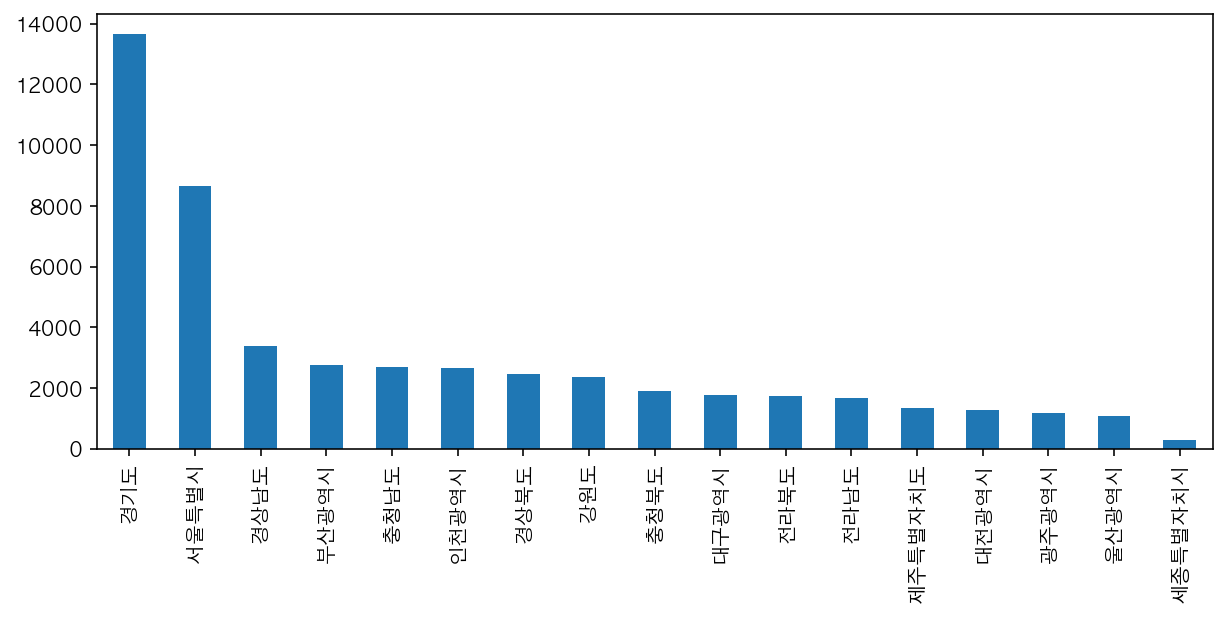

In [7]:
# barplot으로 시도별 편의점 카운트를 확인해줍니다.
df_store["시도명"].value_counts().plot.bar(figsize=(10, 4))

## Pydeck으로 시각화

In [8]:
import pydeck as pdk

In [9]:
# 데이터의 평균으로 지도의 위치를 지정
long = df_store["경도"].mean()
lat = df_store["위도"].mean()
long,lat

(127.47211464346249, 36.63998065698956)

In [12]:
# 레이어
layer = pdk.Layer(
    'HexagonLayer',
    df_store,
    get_position='[경도, 위도]',
    auto_highlight=True,
    elevation_scale=40,
    pickable=True,
    elevation_range=[0, 3000],
    extruded=True,
    coverage= 0.8)

# 지도
view_state = pdk.ViewState(
    longitude= long + 0.3,
    latitude= lat - 1,
    zoom=5.9,
    min_zoom=0,
    max_zoom=15,
    pitch=40,
    bearing=0)

# Render
r = pdk.Deck(layers=[layer], initial_view_state=view_state)
r.to_html('store.html')
r.show() 

DeckGLWidget(carto_key=None, custom_libraries=[], google_maps_key=None, json_input='{"initialViewState": {"bea…

# github에서는 결과물이 보이지 않아 이미지와 store.html 첨부